In [56]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import seaborn as sns
from scipy.special import comb
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import LogNorm
import pandas as pd
import scipy.stats as st

plt.rcParams.update({'font.size': 7,'axes.linewidth':0.5,
                     'xtick.major.size':2,'xtick.major.width':0.5,
                    'ytick.major.size':2,'ytick.major.width':0.5})
plt.rcParams.update({'mathtext.default':  'regular' })


colorH1, colorH3, colorFluB, colorH9 = "#E8735C", "#72C2A6", "#5482A7", "#663399"


In [57]:
# set some things
num_mutations_H1 = 11
order_H1 = 3
num_term_list_H1 = np.array([int(comb(num_mutations_H1,i)) for i in range(1,order_H1+1)])
total_params_H1 = sum(num_term_list_H1)
order_start_indices_H1 = list(np.cumsum(num_term_list_H1)+1)
order_start_indices_H1.insert(0,1)
print(num_term_list_H1,total_params_H1)
print(order_start_indices_H1)

order_H1_xform = 3
num_term_list_H1_xform = np.array([int(comb(num_mutations_H1,i)) for i in range(1,order_H1_xform+1)])
total_params_H1_xform = sum(num_term_list_H1_xform)
order_start_indices_H1_xform = list(np.cumsum(num_term_list_H1_xform)+1)
order_start_indices_H1.insert(0,1)


num_mutations_H9 = 11
order_H9 = 4
num_term_list_H9 = np.array([int(comb(num_mutations_H9,i)) for i in range(1,order_H9+1)])
total_params_H9 = sum(num_term_list_H9)
order_start_indices_H9 = list(np.cumsum(num_term_list_H9)+1)
order_start_indices_H9.insert(0,1)
print(num_term_list_H9,total_params_H9)
print(order_start_indices_H9)

order_H9_xform = 3
num_term_list_H9_xform = np.array([int(comb(num_mutations_H9,i)) for i in range(1,order_H9_xform+1)])
total_params_H9_xform = sum(num_term_list_H9_xform)
order_start_indices_H9_xform = list(np.cumsum(num_term_list_H9_xform)+1)
order_start_indices_H9.insert(0,1)

mut_names = ['29','35','65','66','69','82','83','84','85','87','112.1']

ep_type = 'biochem'
#ep_type = 'stat'

# function = 'power'
# num_func_params = 3

# function = 'spline'
# num_func_params = 5

function = 'logistic'
num_func_params = 4

[ 11  55 165] 231
[1, 12, 67, 232]
[ 11  55 165 330] 561
[1, 12, 67, 232, 562]


# H1

In [58]:
# read model coefficients

coefs_H1 = np.zeros(total_params_H1+1)
names_H1 = []
sig_H1 = np.full((total_params_H1+1),0)
cis_H1 = np.zeros((total_params_H1+1,2))

with open('../../../CR6261/Epistasis_linear_models/model_coefs/H1_'+str(order_H1)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    #print(header)
    for i in range(total_params_H1+1):
        row = next(coef_reader)
        names_H1.append(row[0])
        coefs_H1[i] = float(row[1])
        if i >= 1:
            cis_H1[i,0] = float(row[4])
            cis_H1[i,1] = float(row[5])
            if float(row[4])*float(row[5]) > 0:
                sig_H1[i] = 1
    readfile.close()
            

num_sig = len(np.nonzero(sig_H1 == 1)[0])
print('No transformation: ',len(coefs_H1),num_sig)

coefs_H1_xform = np.zeros(total_params_H1_xform+1)
names_H1_xform = []
sig_H1_xform = np.full((total_params_H1_xform+1),0)
cis_H1_xform = np.zeros((total_params_H1_xform+1,2))

with open('model_coefs/globalep_6261_H1_'+function+str(num_func_params)+'_'+str(order_H1_xform)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(num_func_params+2):
        next(coef_reader)
    num_params_xform = int(next(coef_reader)[-1])
    r2_xform = float(next(coef_reader)[-1])
    header = next(coef_reader)
    #print(header)
    for i in range(total_params_H1_xform+1):
        row = next(coef_reader)
        names_H1_xform.append(row[0])
        coefs_H1_xform[i] = float(row[1])
        if i >= 1:
            cis_H1_xform[i,0] = float(row[4])
            cis_H1_xform[i,1] = float(row[5])
            if float(row[4])*float(row[5]) > 0:
                sig_H1_xform[i] = 1
    readfile.close()
            

num_sig_xform = len(np.nonzero(sig_H1_xform == 1)[0])
print('Transformation: ',len(coefs_H1_xform),num_sig_xform)

both_sig = np.nonzero((sig_H1 == 1) | (sig_H1_xform ==1))[0]
print(len(both_sig))



No transformation:  232 40
Transformation:  232 25
45
20
Percent overlap of sig coefs:  0.5 0.8


0.5237398410761058 0.006237604682839092
0.6786127514487839


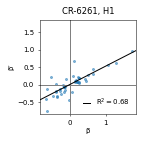

In [61]:
# compare coefficients
regress = st.linregress(coefs_H1[both_sig],coefs_H1_xform[both_sig])
print(regress.slope,regress.intercept)
print(regress.rvalue**2)

minval = min([min(coefs_H1[both_sig]),min(coefs_H1_xform[both_sig])])
maxval = max([max(coefs_H1[both_sig]),max(coefs_H1_xform[both_sig])])


xvals = np.arange(-3,3,0.1)


plt.figure(figsize=(2,2))
plt.scatter(x=coefs_H1[both_sig],y=coefs_H1_xform[both_sig],alpha=0.5,s=4)
#plt.plot([-3,3],[-3,3],color='grey',linewidth=1)
plt.plot([0,0],[-3,3],color='grey',linewidth=1)
plt.plot([-3,3],[0,0],color='grey',linewidth=1)

plt.plot(xvals,regress.slope*xvals+regress.intercept,'k-',label=f'$R^2 = {(regress.rvalue**2):.2f}$',linewidth=1)
plt.legend(loc='lower right',handlelength=1,frameon=False)
plt.xlim([minval-0.1,maxval+0.1])
plt.ylim([minval-0.1,maxval+0.1])
#plt.xticks([-0.5,0,0.5,1,1.5],['-0.5','0','0.5','1.0','1.5'])
plt.xlabel(r"$\beta$",labelpad=0)
plt.ylabel(r"$\beta\prime$",labelpad=0)
plt.title('CR-6261, H1')
plt.tight_layout()
plt.savefig('images/6261_H1_'+function+str(num_func_params)+'_coef_regress.pdf')
plt.show()

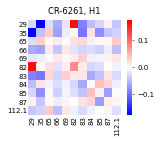

In [55]:
# heatmap of differences between coefs
deltas_H1 = coefs_H1-coefs_H1_xform
deltas_H1_heatmap = np.zeros((num_mutations_H1,num_mutations_H1))

for i in range(1,len(deltas_H1)):

    muts_involved = [int(x)-1 for x in names_H1[i].split(',')]
    if len(muts_involved) == 1:
        deltas_H1_heatmap[muts_involved[0],muts_involved[0]] += deltas_H1[i]
    if len(muts_involved) >= 2:
        for j in range(len(muts_involved)):
            for k in range(j+1,len(muts_involved)):
                deltas_H1_heatmap[muts_involved[k],muts_involved[j]] += deltas_H1[i]
                deltas_H1_heatmap[muts_involved[j],muts_involved[k]] += deltas_H1[i]
                
norm_val = max(np.abs(np.nanmin(deltas_H1_heatmap)),np.abs(np.nanmax(deltas_H1_heatmap)))

fig,ax = plt.subplots(figsize=(2.3,2))
sns.heatmap(deltas_H1_heatmap,cmap='bwr',vmin=-1*norm_val,vmax=norm_val) #,norm=log_norm,cmap='rocket') #,cbar_kws={"ticks": cbar_ticks})
ax.tick_params(length=0,pad=1)
plt.xticks(np.arange(0.5,num_mutations_H9+0.5,1),mut_names,rotation='90')
plt.yticks(np.arange(0.5,num_mutations_H9+0.5,1),mut_names,rotation='0')
plt.title('CR-6261, H1')

plt.tight_layout()
plt.savefig('images/6261_H1_'+function+str(num_func_params)+'_coef_deltas_'+ep_type+'.pdf')
plt.show()


## H9

In [8]:
# read model coefficients

coefs_H9 = np.zeros(total_params_H9+1)
names_H9 = []
sig_H9 = np.full((total_params_H9+1),0)
cis_H9 = np.zeros((total_params_H9+1,2))

with open('../model_coefs/6261_H9_'+str(order_H9)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    #print(header)
    for i in range(total_params_H9+1):
        row = next(coef_reader)
        names_H9.append(row[0])
        coefs_H9[i] = float(row[1])
        if i >= 1:
            cis_H9[i,0] = float(row[3])
            cis_H9[i,1] = float(row[4])
            if float(row[3])*float(row[4]) > 0:
                sig_H9[i] = 1
    readfile.close()
            

num_sig = len(np.nonzero(sig_H9 == 1)[0])
print('No transformation: ',len(coefs_H9),num_sig)



coefs_H9_xform = np.zeros(total_params_H9+1)
names_H9_xform = []
sig_H9_xform = np.full((total_params_H9+1),0)
cis_H9_xform = np.zeros((total_params_H9+1,2))

with open('coefs/globalep_6261_H9_'+function+str(num_func_params)+'_'+str(order_H9_xform)+'order_'+ep_type+'.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    for i in range(num_func_params+2):
        next(coef_reader)
    num_params_xform = int(next(coef_reader)[-1])
    r2_xform = float(next(coef_reader)[-1])
    header = next(coef_reader)
    #print(header)
    for i in range(total_params_H9_xform+1):
        row = next(coef_reader)
        names_H9_xform.append(row[0])
        coefs_H9_xform[i] = float(row[1])
        if i >= 1:
            cis_H9_xform[i,0] = float(row[3])
            cis_H9_xform[i,1] = float(row[4])
            if float(row[3])*float(row[4]) > 0:
                sig_H9_xform[i] = 1
    readfile.close()
            
for i in range(total_params_H9_xform,total_params_H9):
    names_H9_xform.append(names_H9[i])
    

num_sig_xform = len(np.nonzero(sig_H9_xform == 1)[0])
print('Transformation: ',len(coefs_H9_xform),num_sig_xform)

both_sig = np.nonzero((sig_H9 == 1) | (sig_H9_xform ==1))[0]
print(len(both_sig))


No transformation:  562 105
Transformation:  562 70
121
54
Percent overlap of sig coefs:  0.5142857142857142 0.7714285714285715


0.4468365852368063 0.026361553164029775
0.4777841539405606


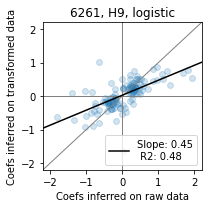

In [9]:
# compare coefficients
regress = st.linregress(coefs_H9[both_sig],coefs_H9_xform[both_sig])
print(regress.slope,regress.intercept)
print(regress.rvalue**2)

xvals = np.arange(-3,3,0.1)

plt.figure(figsize=(3,3))
plt.scatter(x=coefs_H9[both_sig],y=coefs_H9_xform[both_sig],alpha=0.2)
plt.plot([-3,3],[-3,3],color='grey',linewidth=1)
plt.plot([0,0],[-3,3],color='grey',linewidth=1)
plt.plot([-3,3],[0,0],color='grey',linewidth=1)

plt.plot(xvals,regress.slope*xvals+regress.intercept,'k-',label=f'Slope: {regress.slope:.2f}\n R2: {(regress.rvalue**2):.2f}')
plt.legend(loc='lower right')
plt.xlim([-2.2,2.2])
plt.ylim([-2.2,2.2])
plt.xlabel('Coefs inferred on raw data')
plt.ylabel('Coefs inferred on transformed data')
plt.title('6261, H9, '+function)
plt.tight_layout()
plt.savefig('images/6261_H9_'+function+str(num_func_params)+'_coef_regress.pdf')
plt.show()

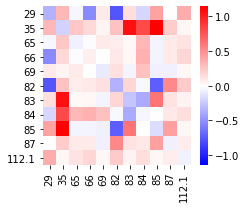

In [19]:
# heatmap of differences between coefs
deltas_H9 = coefs_H9-coefs_H9_xform
deltas_H9_heatmap = np.zeros((num_mutations_H9,num_mutations_H9))

for i in range(1,len(deltas_H9)):

    muts_involved = [int(x)-1 for x in names_H9[i].split(',')]
    if len(muts_involved) == 1:
        deltas_H9_heatmap[muts_involved[0],muts_involved[0]] += deltas_H9[i]
    if len(muts_involved) >= 2:
        for j in range(len(muts_involved)):
            for k in range(j+1,len(muts_involved)):
                deltas_H9_heatmap[muts_involved[k],muts_involved[j]] += deltas_H9[i]
                deltas_H9_heatmap[muts_involved[j],muts_involved[k]] += deltas_H9[i]
                
norm_val = max(np.abs(np.nanmin(deltas_H9_heatmap)),np.abs(np.nanmax(deltas_H9_heatmap)))

plt.figure(figsize=(3.5,3))
sns.heatmap(deltas_H9_heatmap,cmap='bwr',vmin=-1*norm_val,vmax=norm_val) #,norm=log_norm,cmap='rocket') #,cbar_kws={"ticks": cbar_ticks})

plt.xticks(np.arange(0.5,num_mutations_H9+0.5,1),mut_names,rotation='90')
plt.yticks(np.arange(0.5,num_mutations_H9+0.5,1),mut_names,rotation='0')
plt.tight_layout()
plt.savefig('images/6261_H9_'+function+str(num_func_params)+'_coef_deltas.pdf')

plt.show()
